In [2]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud
import re
import seaborn as sns

font_path = "data/THEdog.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

ndf=pd.read_csv('./output/TV_통합_.csv',encoding='euc-kr')
df=pd.read_csv('./output/project/퍼센트/통합장르퍼센트.csv')
df1=pd.read_csv('./output/project/퍼센트/통합세부장르퍼센트.csv')

In [3]:

ndf = ndf.loc[(ndf.date == '10월2주차') | (ndf.date == '10월1주차') | (ndf.date == '9월3주차') | (ndf.date == '9월1주차'),[ 'number', 'detail', 'genre']]


dfgrouped = pd.DataFrame(ndf['number'].groupby(ndf['detail']).sum())
n = ndf['number'].sum()
dfgrouped['percent'] = round(dfgrouped['number']/n*100,1)

display(dfgrouped)

,number,percent
detail,,
가족,2245,0.9
다큐,8999,3.7
로맨스,32525,13.3
로맨틱코미디,16364,6.7
리얼리티,48527,19.8
막장,14071,5.7
미스터리,3265,1.3
버라이어티 쇼,12652,5.2
범죄,5801,2.4


In [4]:
dfgrouped

,number,percent
detail,,
가족,2245,0.9
다큐,8999,3.7
로맨스,32525,13.3
로맨틱코미디,16364,6.7
리얼리티,48527,19.8
막장,14071,5.7
미스터리,3265,1.3
버라이어티 쇼,12652,5.2
범죄,5801,2.4


In [5]:
dfgrouped=dfgrouped.reset_index()

In [6]:
dfgrouped=dfgrouped.rename(columns={'detail':'index'})

In [7]:
dfgrouped

,index,number,percent
0,가족,2245,0.9
1,다큐,8999,3.7
2,로맨스,32525,13.3
3,로맨틱코미디,16364,6.7
4,리얼리티,48527,19.8
5,막장,14071,5.7
6,미스터리,3265,1.3
7,버라이어티 쇼,12652,5.2
8,범죄,5801,2.4
9,사극,6509,2.7


In [8]:
#dfgrouped
dfgrouped=dfgrouped.loc[:,['index','percent']]

In [9]:
dfgrouped

,index,percent
0,가족,0.9
1,다큐,3.7
2,로맨스,13.3
3,로맨틱코미디,6.7
4,리얼리티,19.8
5,막장,5.7
6,미스터리,1.3
7,버라이어티 쇼,5.2
8,범죄,2.4
9,사극,2.7


In [10]:
dfgrouped.set_index(keys='index',inplace=True)

In [11]:
dfgrouped

,percent
index,
가족,0.9
다큐,3.7
로맨스,13.3
로맨틱코미디,6.7
리얼리티,19.8
막장,5.7
미스터리,1.3
버라이어티 쇼,5.2
범죄,2.4


In [12]:
df.set_index(keys='index',inplace=True)
df1.set_index(keys='index',inplace=True)

In [13]:
df

,percent
index,
액션,52.30
모혐,2.00
애니메이션,50.61
코미디,30.97
범죄,34.65
드라마,71.92
공포,20.00
스릴러,22.33
미스테리,12.00


In [14]:
df1

,percent
index,
애니메이션,36.75
범죄,10.22
드라마,33.58
스릴러,41.64
코미디,14.53
로맨스,42.00
공포,6.50
좀비,13.51
음식,10.53


In [15]:
df=pd.concat([df,dfgrouped],axis=1)
df

,percent,percent
index,,
액션,52.30,NaN
모혐,2.00,NaN
애니메이션,50.61,NaN
코미디,30.97,0.2
범죄,34.65,2.4
드라마,71.92,NaN
공포,20.00,NaN
스릴러,22.33,NaN
미스테리,12.00,NaN


In [16]:
df=pd.DataFrame(df.percent.sum(axis=1))

In [17]:
df=df.rename(columns={0:'percent'})

In [18]:
df

,percent
index,
액션,52.30
모혐,2.00
애니메이션,50.61
코미디,31.17
범죄,37.05
드라마,71.92
공포,20.00
스릴러,22.33
미스테리,12.00


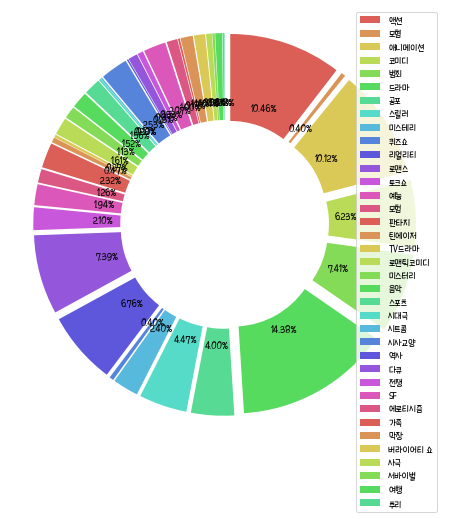

In [38]:
fig = plt.figure(figsize=(15,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성


mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(df.index)):
    explode.append(0.1)

pie = ax.pie(df.percent,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )





plt.legend(pie[0],df.index) ## 범례 표시
plt.show()

In [20]:
adf=df*100

In [21]:
adf

,percent
index,
액션,5230.0
모혐,200.0
애니메이션,5061.0
코미디,3117.0
범죄,3705.0
드라마,7192.0
공포,2000.0
스릴러,2233.0
미스테리,1200.0


In [22]:
adf
percent=[]
for i in range(len(adf.index)):
    percent.append((adf.percent[i]))

In [23]:
adf=adf.rename(columns={'percent':'cnt'})
adf

,cnt
index,
액션,5230.0
모혐,200.0
애니메이션,5061.0
코미디,3117.0
범죄,3705.0
드라마,7192.0
공포,2000.0
스릴러,2233.0
미스테리,1200.0


In [24]:
cntsum=pd.DataFrame(adf.sum(axis=0))
cntsum=cntsum.rename(columns={0:'a'})
cntsum.a

(adf.cnt[0]/cntsum.a)*100

adf
a=[]
for i in range(len(adf.index)):
    a.append((adf.cnt[i])/cntsum.a*100)

percent=[]
for i in range(len(adf.index)):
    percent.append(round(a[i],2))

percent=pd.DataFrame(percent)
percent=percent.rename(columns={'cnt':'percent'})
percent=percent.reset_index()
percent=percent.percent

percent=pd.DataFrame(percent)
percent.percent

adf1=adf.reset_index()
adf1=pd.concat([adf1,percent],axis=1)
adf1
adf1.set_index('index',inplace=True)

In [25]:
#통합 백분률
adf1.to_csv('./output/project/통합장르_백분률.csv')

In [26]:
adf1

,cnt,percent
index,,
액션,5230.0,10.46
모혐,200.0,0.40
애니메이션,5061.0,10.12
코미디,3117.0,6.23
범죄,3705.0,7.41
드라마,7192.0,14.38
공포,2000.0,4.00
스릴러,2233.0,4.47
미스테리,1200.0,2.40


In [27]:
df1=pd.concat([df1,dfgrouped],axis=1)
df1

,percent,percent
index,,
애니메이션,36.75,NaN
범죄,10.22,2.4
드라마,33.58,NaN
스릴러,41.64,NaN
코미디,14.53,0.2
로맨스,42.00,13.3
공포,6.50,NaN
좀비,13.51,NaN
음식,10.53,NaN


In [28]:
df1=pd.DataFrame(df1.percent.sum(axis=1))
df1=df1.rename(columns={0:'percent'})
df1

,percent
index,
애니메이션,36.75
범죄,12.62
드라마,33.58
스릴러,41.64
코미디,14.73
로맨스,55.30
공포,6.50
좀비,13.51
음식,10.53


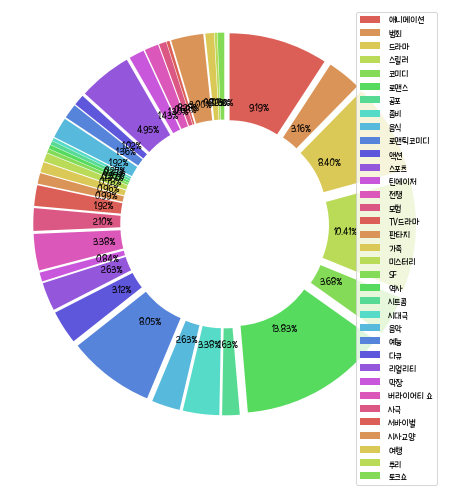

In [39]:
fig = plt.figure(figsize=(15,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성



mycolors=sns.color_palette('hls', 15)

explode=[]
x=0.05
for i in range(len(df1.index)):
    explode.append(0.1)

pie = ax.pie(df1.percent,
             startangle=90,
             counterclock=False,
             autopct=lambda p : '{:.2f}%'.format(p),
             colors=mycolors,
             explode=explode,
             wedgeprops=dict(width=0.5),

       )





plt.legend(pie[0],df1.index) ## 범례 표시
plt.show()

In [30]:
df1

,percent
index,
애니메이션,36.75
범죄,12.62
드라마,33.58
스릴러,41.64
코미디,14.73
로맨스,55.30
공포,6.50
좀비,13.51
음식,10.53


In [31]:
adf1=df1*100
adf1

,percent
index,
애니메이션,3675.0
범죄,1262.0
드라마,3358.0
스릴러,4164.0
코미디,1473.0
로맨스,5530.0
공포,650.0
좀비,1351.0
음식,1053.0


In [32]:
adf1
percent=[]
for i in range(len(adf1.index)):
    percent.append((adf1.percent[i]))

In [228]:
adf1=adf1.rename(columns={'percent':'cnt'})
adf1

,cnt
index,
애니메이션,3675.0
범죄,1262.0
드라마,3358.0
스릴러,4164.0
코미디,1473.0
로맨스,5530.0
공포,650.0
좀비,1351.0
음식,1053.0


In [234]:
cntsum=pd.DataFrame(adf1.sum(axis=0))
cntsum=cntsum.rename(columns={0:'a'})
cntsum.a

(adf1.cnt[0]/cntsum.a)*100

adf1
a=[]
for i in range(len(adf1.index)):
    a.append((adf1.cnt[i])/cntsum.a*100)

percent=[]
for i in range(len(adf1.index)):
    percent.append(round(a[i],2))

percent=pd.DataFrame(percent)
percent=percent.rename(columns={'cnt':'percent'})
percent=percent.reset_index()
percent=percent.percent

percent=pd.DataFrame(percent)
percent.percent

adf2=adf1.reset_index()
adf2=pd.concat([adf2,percent],axis=1)
adf2
adf2.set_index('index',inplace=True)

In [240]:
adf2.to_csv('./output/project/통합세부장르백분률.csv')

In [241]:
adf2

,cnt,percent
index,,
애니메이션,3675.0,9.19
범죄,1262.0,3.16
드라마,3358.0,8.40
스릴러,4164.0,10.41
코미디,1473.0,3.68
로맨스,5530.0,13.83
공포,650.0,1.63
좀비,1351.0,3.38
음식,1053.0,2.63
